# Preprocessing & Exploration

In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator , load_img

import os

number_classes = 7 
rows=48
cols=48
batch_size = 16

train_data_direction = './dataset/train'
test_data_direction = './dataset/test'

#Using Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range=30,
                                  shear_range=0.3,
                                  zoom_range=0.3,
                                  width_shift_range=0.4,
                                  height_shift_range=0.4,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
        train_data_direction,
        color_mode = 'grayscale',
        target_size = (rows , cols),
        batch_size = batch_size,
        class_mode = 'categorical',
        shuffle = True)

test_generator = test_datagen.flow_from_directory(
        test_data_direction,
        color_mode = 'grayscale',
        target_size = (rows , cols),
        batch_size = batch_size,
        class_mode = 'categorical',
        shuffle = True)



Using TensorFlow backend.


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Exploration

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


<AxesSubplot:>

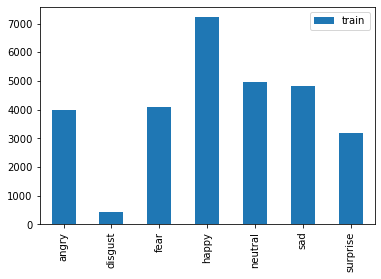

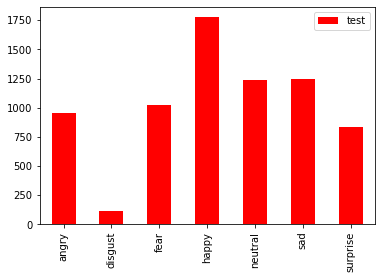

In [22]:
import pandas as pd
train_direction = './dataset//train/'
test_direction = './dataset/test/'

def get_count(path,set_):   
    dict_ = {}  
    for exp in os.listdir(path):    
        dir_ = path + exp
        dict_[exp] = len(os.listdir(dir_))    
    df = pd.DataFrame(dict_,index=[set_]) 
    return df

train_count = get_count(train_direction,'train')
test_count = get_count(test_direction,'test')

print(train_count)
print(test_count)

train_count.transpose().plot(kind = 'bar')
test_count.transpose().plot(kind = 'bar',color='r')


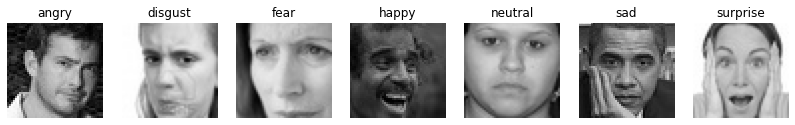

In [34]:
plt.figure(figsize=(14,22))
i = 1

for exp in os.listdir(train_direction):
    
    img = load_img((train_direction + exp + '/' + os.listdir(train_direction + exp)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(exp)
    plt.axis('off')
    i += 1
    
plt.show()

## Create Keras Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import ELU
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal', input_shape=(rows,cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal', input_shape=(rows,cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(64, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(128, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(256, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(512, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(512, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(1024, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(1024, (3,3), padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


#Softmax Activation in Output
model.add(Dense(number_classes, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())

In [ ]:
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./checkpoint/emotion_model.h5",
                            monitor="val_loss",
                            mode="min",
                            save_best_only=True,
                            verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss',
                         min_delta = 0,
                         patience = 10,
                         verbose=1,
                         restore_best_weights = True)


reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)

#Create callback list
callbacks = [earlystop, checkpoint, reduce_lr]

model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(lr=0.001),
             metrics=['accuracy'])


total_train_samples = train_generator.samples
total_test_samples = test_generator.samples
epochs = 40


history = model.fit(
            train_generator,
            steps_per_epoch=total_train_samples // batch_size,
            epochs = epochs,
            callbacks = callbacks,
            validation_data = test_generator,
            validation_steps = total_test_samples // batch_size)

# Evaluation

### Accuracy & Loss

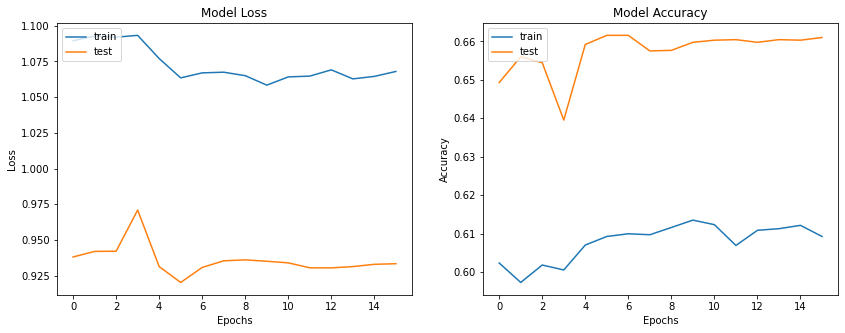

In [37]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Confusion Matrix + Classification Report

Confusion Matrix
[[ 575    7  298 1062  904  715  434]
 [  44    0   29  128  102   90   43]
 [ 538   11  319 1084  900  770  475]
 [ 973   17  573 1890 1555 1372  835]
 [ 711   12  394 1307 1061  872  608]
 [ 655   16  394 1287 1028  882  568]
 [ 470    4  252  853  670  562  360]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.14      0.14      3995
     disgust       0.00      0.00      0.00       436
        fear       0.14      0.08      0.10      4097
       happy       0.25      0.26      0.25      7215
     neutral       0.17      0.21      0.19      4965
         sad       0.17      0.18      0.17      4830
    surprise       0.11      0.11      0.11      3171

    accuracy                           0.18     28709
   macro avg       0.14      0.14      0.14     28709
weighted avg       0.17      0.18      0.17     28709



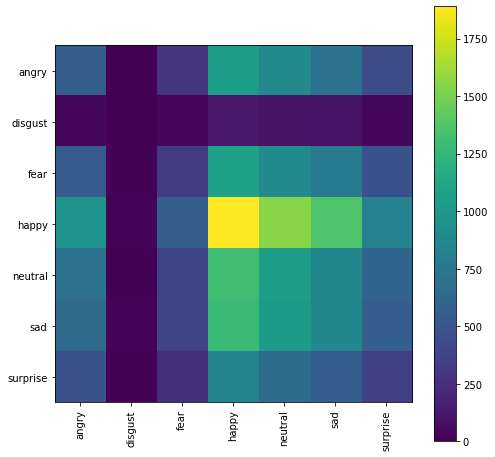

In [6]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

model = load_model('./checkpoint/emotion_model.h5')

y_pred = model.predict(train_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

cm_train = confusion_matrix(train_generator.classes, y_pred)

print('Confusion Matrix')
print(cm_train)

print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(train_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
a = plt.xticks(tick_mark, target_names, rotation=90)
b = plt.yticks(tick_mark, target_names)

# To Resume Model Training

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import ELU
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator


number_classes = 7 
rows=48
cols=48
batch_size = 32

train_data_direction = './dataset/train'
test_data_direction = './dataset/test'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range=30,
                                  shear_range=0.3,
                                  zoom_range=0.3,
                                  width_shift_range=0.4,
                                  height_shift_range=0.4,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

for i in range(100):

    checkpoint = ModelCheckpoint("./checkpoint/emotion_model.h5",
                                monitor="val_loss",
                                mode="min",
                                save_best_only=True,
                                verbose=1)
    
    earlystop = EarlyStopping(monitor = 'val_loss',
                             min_delta = 0,
                             patience = 10,
                             verbose=1,
                             restore_best_weights = True)
    
    
    reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)
    
    callbacks = [earlystop, checkpoint, reduce_lr]
    train_generator = train_datagen.flow_from_directory(
            train_data_direction,
            color_mode = 'grayscale',
            target_size = (rows , cols),
            batch_size = batch_size,
            class_mode = 'categorical',
            shuffle = True)
    
    test_generator = test_datagen.flow_from_directory(
            test_data_direction,
            color_mode = 'grayscale',
            target_size = (rows , cols),
            batch_size = batch_size,
            class_mode = 'categorical',
            shuffle = True)
    
    total_train_samples = train_generator.samples
    total_test_samples = test_generator.samples
    epochs = 40
    model = load_model('./checkpoint/emotion_model.h5')
    
    model.compile(loss = 'categorical_crossentropy',
                 optimizer = Adam(lr=0.001),
                 metrics=['accuracy'])
    
    print(i)
    history = model.fit(
                train_generator,
                steps_per_epoch=total_train_samples // batch_size,
                epochs = epochs,
                callbacks = callbacks,
                validation_data = test_generator,
                validation_steps = total_test_samples // batch_size)

# OpenCV Integration + Simulation

In [4]:
import cv2
import numpy as np
from time import sleep
from tensorflow.keras.preprocessing.image import img_to_array
import pickle as pkl
from tensorflow.keras.models import load_model


class_labels = pkl.load(open('checkpoint/class_labels.pkl','rb'))
face_classifier = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
classifier = load_model('./checkpoint/emotion_model.h5')


def face_detector(img):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    for(x,y,w,h) in faces:
        x = x-50
        w = w+50
        y = y-50
        h = h+50
        cv2.rectangle(img, (x,y), (x+w,y+h) , (255,0,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        
    try:
        roi_gray = cv2.resize(roi_gray, (48,48), interpolation = cv2.INTER_AREA)
    except:
        return (x,w,y,h), np.zeros((48,48), np.uint8), img
    return (x,w,y,h), roi_gray, img

cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read()
    rect, face, image = face_detector(frame)
    if np.sum([face]) != 0.0:
        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        
        preds = classifier.predict(roi)[0]
        label = class_labels[preds.argmax()]
        label_position = (rect[0] + int((rect[1]/2)), rect[2] + 25)
        cv2.putText(image, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 3)
    else:
        cv2.putText(image, "No Face found", (20,60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 3)
        
    cv2.imshow('Emotion Detector', image)
    if cv2.waitKey(1) == 13:
        break
        
cap.release()
cv2.destroyAllWindows()
    
    
    
    
    
    


## Predict Single Picture

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import cv2
import tensorflow as tf
from os import listdir
from os.path import isfile, join
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
import pickle as pkl
print(tf.__version__)
class_labels = pkl.load(open('checkpoint/class_labels.pkl','rb'))
face_classifier = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
classifier = load_model('./checkpoint/emotion_model.h5')

2.3.1


In [12]:
import random
def face_detector(img):
    
    gray = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    allfaces = []
    rects = []
    for(x,y,w,h) in faces:
        
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48,48), interpolation = cv2.INTER_AREA)
        allfaces.append(roi_gray)
        rects.append((x,w,y,h))
    return rects,allfaces, img

def predict_image(img_path):
    img = cv2.imread(img_path)
    rects, faces, image = face_detector(img)
    i=0
    for face in faces:
        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        
        preds = classifier.predict(roi)[0]
        label = class_labels[preds.argmax()]
        
        label_position = (rects[i][0] + int ((rects[i][1]/2)), abs(rects[i][2] - 10))
        i+=1
        cv2.putText(image, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 3)
        
    image = image[:,:,::-1]
    print(image.shape)
    return array_to_img(image), img

#Example
_hash = str(random.getrandbits(128))
img_name = "sad-man.jpg"
img_path = 'uploads/sad-man.jpg'
predicted_image, img = predict_image(img_path)
cv2.imwrite(r'rendered/result.jpg', img)

(2131, 2330, 3)


TypeError: img is not a numpy array, neither a scalar

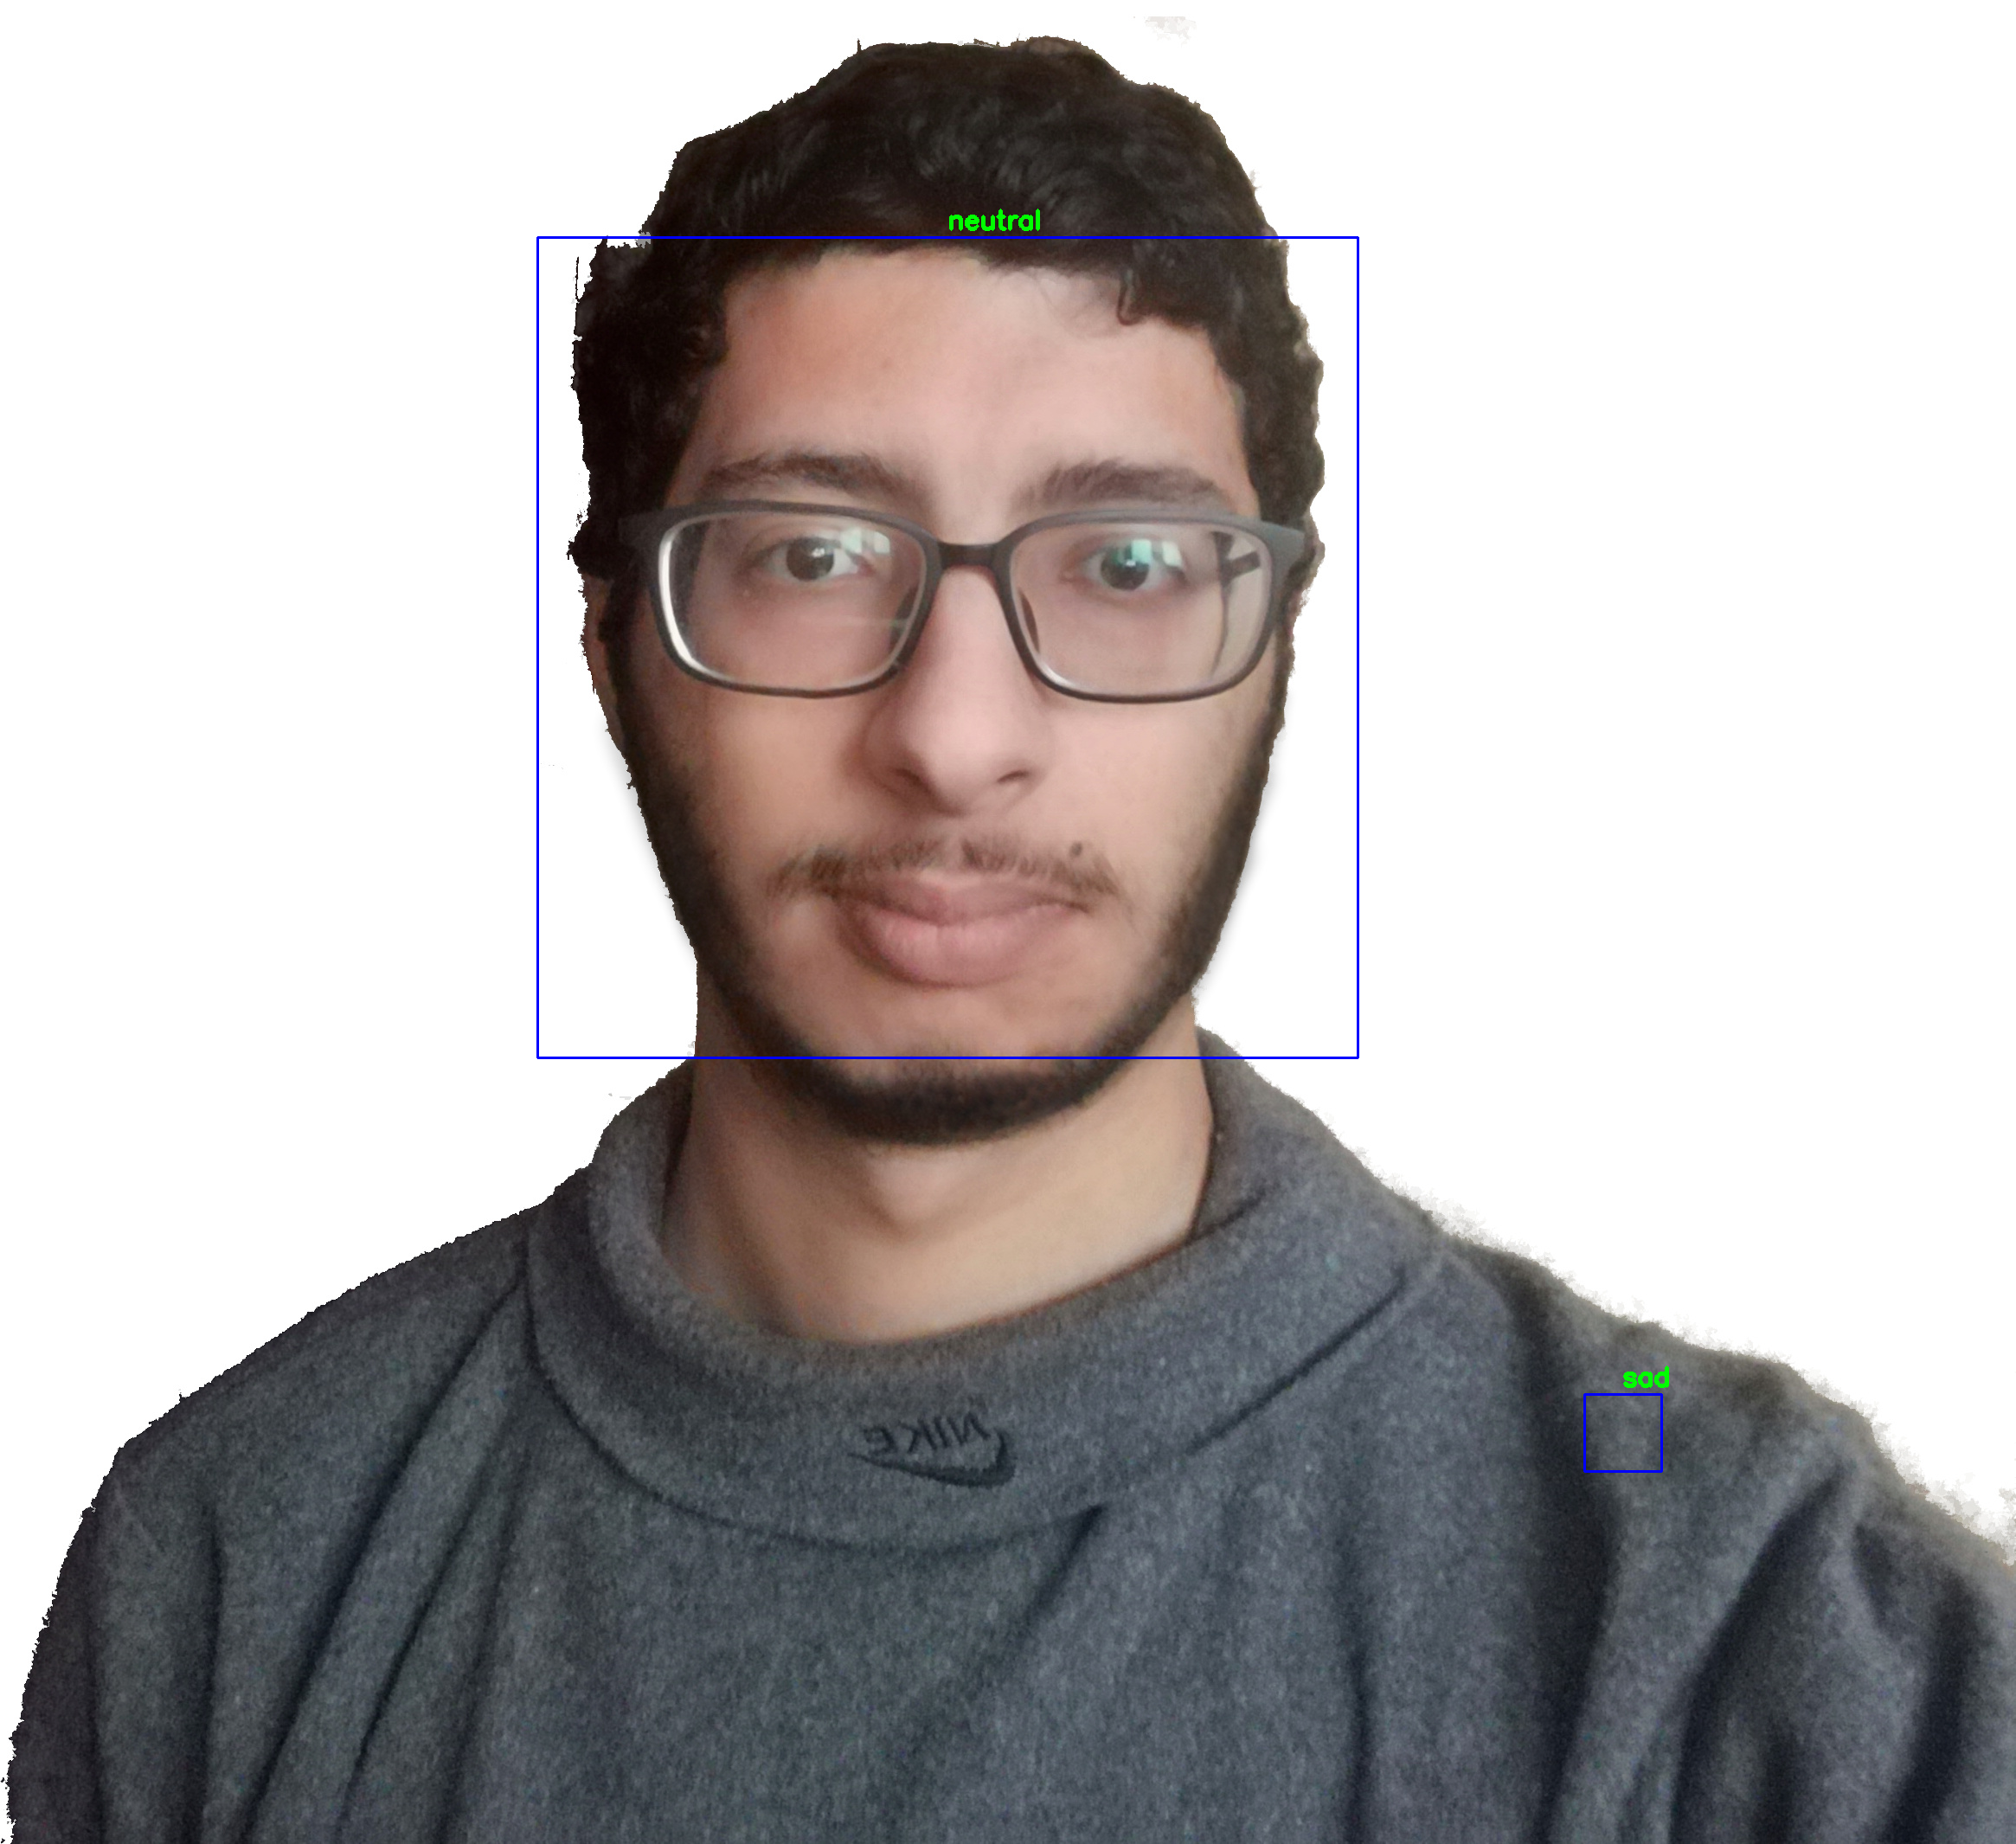

In [4]:
predicted_image